In [1]:
from sklearn.datasets import make_blobs
import numpy as np

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [2]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

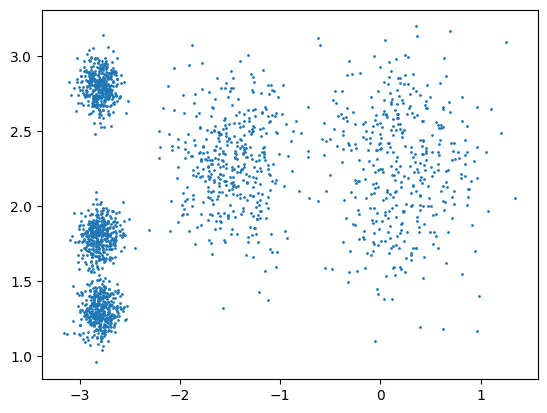

In [10]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:, 1], c=None,s=1)

In [13]:
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

/home/eddie/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [14]:
kmeans.labels_

array([4, 0, 1, ..., 2, 1, 0], dtype=int32)

In [15]:
y_pred

array([4, 0, 1, ..., 2, 1, 0], dtype=int32)

In [16]:
# Centroids that the algorithm found
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

In [17]:
X_new = np.array([[0,2],[3,2],[-3,3],[-3,2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2], dtype=int32)

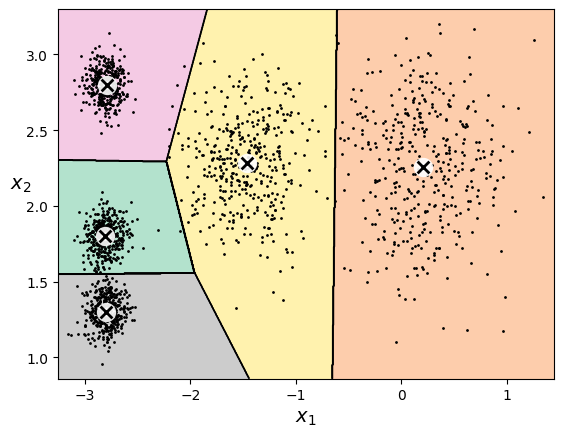

In [18]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

plot_decision_boundaries(kmeans, X)
plt.show()

In [32]:
from matplotlib.image import imread

image = imread('j_swe.jpg')
image.shape

(2048, 1095, 3)

In [43]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

/home/eddie/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/home/eddie/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/eddie/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/eddie/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/eddie/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/eddie/.local/lib/python3.10/si

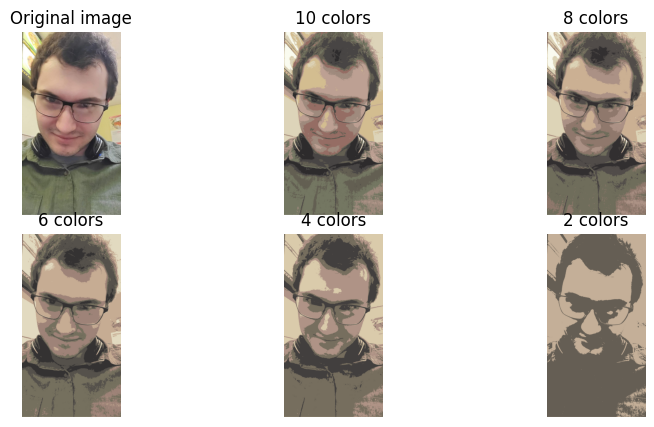

In [45]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_img = np.array(segmented_img).astype(np.int32)
    segmented_imgs.append(segmented_img.reshape(image.shape))

plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

plt.show()

In [42]:
segmented_imgs[2]

array([[[158.08824141, 131.9249645 , 120.02201652],
        [158.08824141, 131.9249645 , 120.02201652],
        [158.08824141, 131.9249645 , 120.02201652],
        ...,
        [226.21753905, 218.79757117, 192.31572848],
        [226.21753905, 218.79757117, 192.31572848],
        [226.21753905, 218.79757117, 192.31572848]],

       [[158.08824141, 131.9249645 , 120.02201652],
        [158.08824141, 131.9249645 , 120.02201652],
        [158.08824141, 131.9249645 , 120.02201652],
        ...,
        [226.21753905, 218.79757117, 192.31572848],
        [226.21753905, 218.79757117, 192.31572848],
        [226.21753905, 218.79757117, 192.31572848]],

       [[158.08824141, 131.9249645 , 120.02201652],
        [158.08824141, 131.9249645 , 120.02201652],
        [158.08824141, 131.9249645 , 120.02201652],
        ...,
        [226.21753905, 218.79757117, 192.31572848],
        [226.21753905, 218.79757117, 192.31572848],
        [226.21753905, 218.79757117, 192.31572848]],

       ...,

      

In [22]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

X_digits, y_digits = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50)),
    ("log_reg", LogisticRegression())
])

pipeline.fit(X_train, y_train)

pipeline.score(X_test, y_test)

/home/eddie/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/eddie/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9666666666666667

In [46]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'kmeans__n_clusters': range(2,100)
}
gs = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
# gs.fit(X_train, y_train)

In [24]:
gs.best_params_

{'kmeans__n_clusters': 64}

In [25]:
gs.score(X_test, y_test)

0.9711111111111111

In [58]:
n_labeled = 50
log_reg = LogisticRegression(multi_class="ovr")
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

0.8422222222222222

/home/eddie/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


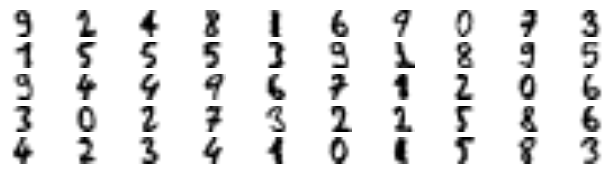

In [55]:
k = 50
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

plt.show()

In [56]:
y_representative_digits = np.array([
    9, 2, 4, 8, 1, 6, 9, 0, 7, 3,
    1, 5, 5, 5, 3, 9, 1, 8, 9, 5,
    9, 4, 4, 9, 6, 7, 1, 2, 0, 6,
    3, 0, 2, 7, 3, 2, 2, 5, 8, 6,
    4, 2, 3, 4, 1, 0, 1, 5, 8, 3])
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.9111111111111111

In [59]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [60]:
log_reg = LogisticRegression(multi_class="ovr")
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

/home/eddie/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.92

In [70]:
percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]


In [71]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [72]:
log_reg.score(X_test, y_test)

0.9222222222222223

In [73]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.9895104895104895

In [74]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X,y)

DBSCAN(eps=0.05)

In [76]:
# instances with labels = -1 are anomalies
dbscan.labels_

9

In [77]:
len(dbscan.core_sample_indices_)

789

In [81]:
# indices of core instances
dbscan.core_sample_indices_

# Core instances 
(dbscan.components_) == X_train[dbscan.core_sample_indices_]

/tmp/ipykernel_803148/1462468564.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  (dbscan.components_) == X_train[dbscan.core_sample_indices_]


False

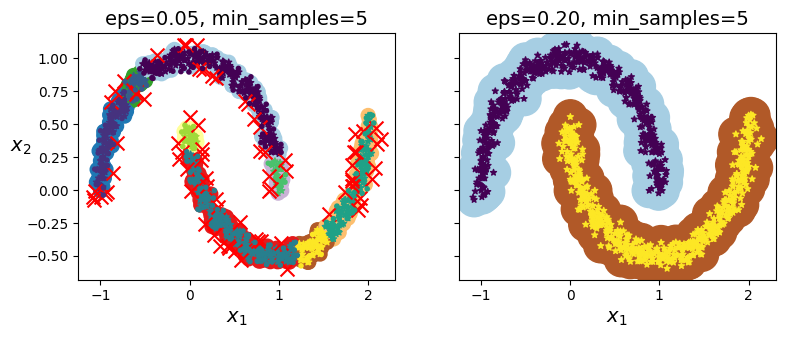

In [90]:
dbscan2 = DBSCAN(eps=0.2, min_samples=5)
dbscan2.fit(X,y)
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()

In [94]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan2.components_, dbscan2.labels_[dbscan2.core_sample_indices_])
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([0, 1, 0, 1])

In [95]:
knn.predict_proba(X_new)

array([[0.78, 0.22],
       [0.  , 1.  ],
       [0.82, 0.18],
       [0.  , 1.  ]])

In [102]:
# Label as anomalies if their nearest neighbor is too far
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan2.labels_[dbscan2.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  1,  0, -1])

In [123]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [124]:
gm.weights_

array([0.40009697, 0.20925194, 0.39065109])

In [125]:
gm.means_

array([[-1.40745226,  1.42727761],
       [ 3.40241777,  1.05702687],
       [ 0.05292802,  0.07720061]])

In [126]:
gm.covariances_

array([[[ 0.63518782,  0.7300408 ],
        [ 0.7300408 ,  1.16123726]],

       [[ 1.14357415, -0.02922398],
        [-0.02922398,  0.95297095]],

       [[ 0.69052478,  0.79895376],
        [ 0.79895376,  1.21568342]]])

In [127]:
gm.converged_

True

In [128]:
gm.n_iter_

6

In [129]:
gm.predict(X)

array([2, 2, 0, ..., 1, 1, 1])

In [130]:
gm.predict_proba(X)

array([[6.80542526e-07, 2.27284124e-02, 9.77270907e-01],
       [6.78281758e-04, 1.60398423e-02, 9.83281876e-01],
       [9.99922872e-01, 1.93447944e-06, 7.51931764e-05],
       ...,
       [2.19704604e-26, 9.99999561e-01, 4.39240952e-07],
       [1.52817376e-41, 1.00000000e+00, 5.39200212e-16],
       [8.29296554e-41, 1.00000000e+00, 2.33864674e-15]])

In [131]:
X_new, y_new = gm.sample(6)
X_new

array([[-1.08325367,  1.62258041],
       [-1.83264394,  1.56570275],
       [-2.10481072,  0.75559725],
       [ 3.92355447,  0.39055389],
       [-0.01545681, -0.24384157],
       [ 0.30046431,  0.4865532 ]])

In [132]:
y_new

array([0, 0, 0, 1, 2, 2])

In [133]:
gm.score_samples(X)

array([-2.60562363, -3.57128156, -3.33045538, ..., -3.51403945,
       -4.39552047, -3.80518816])

In [134]:
np.exp(gm.score_samples(X)[3])

0.07761523541737696

In [137]:
np.exp(gm.score_samples(X))[50:100]

array([0.03894164, 0.13382274, 0.06307462, 0.05105663, 0.08676619,
       0.04033901, 0.12914546, 0.12274317, 0.11409474, 0.12413772,
       0.02153913, 0.07022802, 0.00951065, 0.09410121, 0.11916826,
       0.12593745, 0.0815919 , 0.04027476, 0.06134038, 0.02372717,
       0.09646373, 0.07141058, 0.08729232, 0.10831995, 0.09137671,
       0.02415671, 0.08827546, 0.08483491, 0.12605802, 0.02973529,
       0.01331674, 0.1357777 , 0.05233112, 0.13504912, 0.13792319,
       0.07705555, 0.01473752, 0.11451886, 0.10455401, 0.07684948,
       0.02913205, 0.0906063 , 0.07144896, 0.03008293, 0.10391683,
       0.07775394, 0.10707141, 0.0110726 , 0.12864527, 0.01669799])

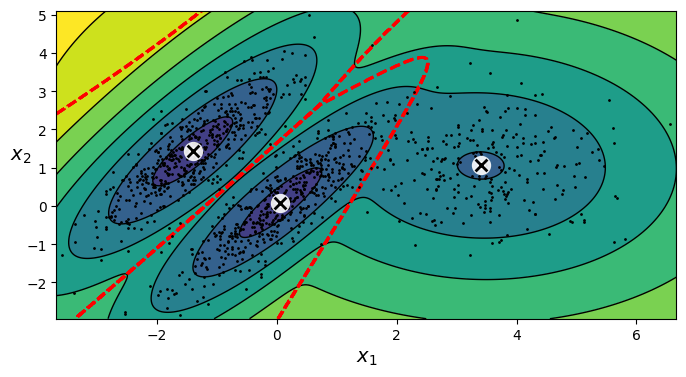

In [138]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)
plt.show()

In [139]:
# Anomaly detection
# Any instance located in a low-density region
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

In [140]:
gm.bic(X)

8189.631185845494

In [141]:
gm.aic(X)

8102.405905730456

In [142]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=10)
bgm.fit(X)
np.round(bgm.weights_, 2)

/home/eddie/.local/lib/python3.10/site-packages/sklearn/mixture/_base.py:274: ConvergenceWarning: Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


array([0.08, 0.4 , 0.  , 0.32, 0.2 , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [1]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()

In [2]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
train_valid_idx, test_idx = next(strat_split.split(olivetti.data, olivetti.target))
X_train_valid = olivetti.data[train_valid_idx]
y_train_valid = olivetti.target[train_valid_idx]
X_test = olivetti.data[test_idx]
y_test = olivetti.target[test_idx]

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=43)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))
X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]



In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.99)

X_train = pca.fit_transform(X_train)
X_valid = pca.transform(X_valid)
X_test = pca.transform(X_test)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=60, n_init=10).fit(X_train)

In [23]:
pca.n_components_

163

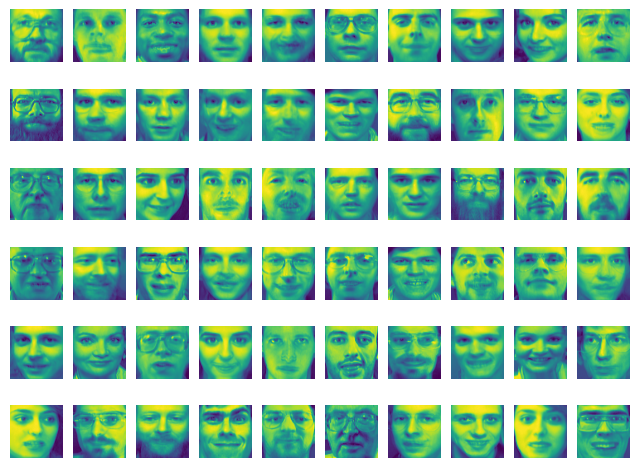

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

def plot_imgs(imgs):
    for index, img in enumerate(imgs):
        img = img.reshape(64,64)
        plt.subplot(6, 10, index + 1)
        plt.imshow(img)
        plt.axis("off")

plot_imgs(kmeans.cluster_centers_)

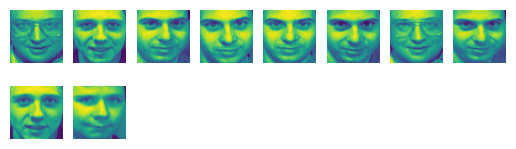

In [10]:
imgs = []

for index,label in enumerate(kmeans.labels_):
    if label == 7:
        imgs.append(X_train[index])

plot_imgs(imgs)

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
print(log_reg.score(X_valid, y_valid))

pipeline = Pipeline([
    ('kmeans', KMeans(n_clusters=120, n_init=10)),
    ('log_reg', LogisticRegression())
])
pipeline.fit(X_train, y_train)
pipeline.score(X_valid, y_valid)

/home/eddie/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.975


/home/eddie/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.875

In [19]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'kmeans__n_clusters': range(2,200)}
]
gs = GridSearchCV(pipeline, param_grid, cv=3)
gs.fit(X_train, y_train)

/home/eddie/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/eddie/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=120, n_init=10)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kmeans__n_clusters': range(2, 200)}])

In [20]:
gs.best_params_

{'kmeans__n_clusters': 139}

In [21]:
gs.score(X_valid, y_valid)

0.9

In [24]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=40)
gm.fit(X_train)

GaussianMixture(n_components=40)

In [25]:
gm.sample(6)

(array([[-6.93829524e+00,  1.64699871e+00, -3.27848732e+00,
         -5.06764559e+00,  1.35725946e-01, -1.00344853e+00,
         -3.01360212e+00,  3.64790168e-01, -1.98567564e-01,
          5.75424180e-02, -3.36128850e+00, -1.18763504e+00,
         -1.40299223e+00, -1.06581468e+00, -2.45977619e+00,
          1.15917623e+00, -9.20445768e-01,  1.34142020e+00,
          1.19626003e+00, -7.44767024e-01, -4.87402687e-03,
          1.00856818e+00,  2.15878701e+00, -9.85030821e-01,
          1.68174858e+00,  1.88029988e+00,  3.44747639e+00,
          1.59218830e+00, -1.70028350e+00,  2.86662394e+00,
         -1.07210558e+00,  6.72335140e-01,  1.54573808e+00,
          5.89677099e-01,  1.29122107e+00,  2.10000246e-01,
          9.22009639e-01, -5.40628815e-01, -6.52631826e-01,
          9.83936643e-01,  1.09138943e+00, -1.23994303e-01,
          1.51896984e-02, -1.94819664e+00, -9.02965114e-02,
         -4.08484308e-01,  4.98504080e-01, -5.32015512e-01,
          1.98647827e-01, -1.75410197e+0

In [32]:
import numpy as np
X_new, y_new = gm.sample(5)

np.exp(X_new)

array([[3.14703064e-01, 5.87640412e+01, 5.73444826e+00, 2.48944203e+00,
        1.58306574e+00, 2.45083075e+02, 1.10991111e+00, 1.89099584e-01,
        2.91238685e+00, 5.62483755e-01, 1.96157668e-01, 4.65394685e+00,
        3.63790464e-01, 7.15856375e-02, 9.98127163e-01, 4.94653405e-01,
        1.47387152e+00, 1.44635010e+00, 7.21141423e-01, 1.70423945e+00,
        4.85349303e-01, 9.76858355e-02, 1.18838933e+00, 1.58315576e+00,
        4.58523293e-01, 1.25513993e+00, 1.14537233e+00, 4.39086425e-01,
        4.73325175e-01, 7.79934353e-01, 7.79790438e-01, 4.22024834e-01,
        1.22902182e+00, 1.22724216e+00, 9.47456153e-01, 1.37445729e+00,
        3.20124949e-01, 8.76059454e-01, 1.17982300e+00, 7.29643896e-01,
        3.90203020e-01, 1.07949829e+00, 1.56500566e+00, 5.76253231e-01,
        3.21815560e-01, 2.31363858e+00, 1.32412500e+00, 1.54188228e+00,
        6.79646758e-01, 5.25254927e-01, 2.26640816e+00, 3.12800039e-01,
        2.18004967e+00, 7.46751538e-01, 2.27682904e+00, 4.658502

In [33]:
X_train[0]

array([ 3.78082776e+00, -1.85479927e+00, -5.14403582e+00, -9.98655140e-01,
        3.06245565e+00,  1.55372059e+00,  9.20922518e-01, -8.15477610e-01,
       -1.21791673e+00, -5.06183431e-02,  1.49859703e+00, -1.24899817e+00,
        1.72129798e+00, -5.49620211e-01, -4.75430608e-01, -1.12469494e+00,
       -4.75992672e-02,  1.15354836e+00, -3.75069290e-01,  2.74989337e-01,
       -1.67208031e-01,  1.00080454e+00, -1.08169639e+00,  1.37923673e-01,
       -1.10512459e+00,  2.67931640e-01, -1.11656994e-01, -1.63057417e-01,
       -4.11374509e-01, -1.75422523e-02, -7.17692614e-01, -1.35185373e+00,
       -2.54896075e-01, -1.29641759e+00, -5.42401373e-01, -4.60986048e-01,
        2.05344662e-01, -2.74766870e-02, -5.56162477e-01,  9.54050899e-01,
       -1.15970480e+00, -3.64064053e-02,  4.14419502e-01, -3.82499933e-01,
        2.50606149e-01,  1.22059390e-01,  1.59336507e-01,  1.52632132e-01,
       -2.06711531e-01,  2.73795068e-01, -3.54167104e-01, -4.67707038e-01,
       -2.86132157e-01, -